In [12]:
import numpy as np
import tensorflow as tf
from time import time
import math
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
'''
Step	Description
load_data()	Fetches the 60,000 32×32 RGB images (50k train, 10k test).
astype("float32")/255.0	Normalizes pixel values from [0, 255] → [0, 1] — crucial for stable training.
to_categorical()	Converts label 3 into vector [0, 0, 0, 1, 0, ..., 0]. Needed for categorical crossentropy.
'''
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

num_classes = 10
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)


In [4]:
'''
Layer/Block	What it does
Conv2D(32, 3)	Learns 32 filters of 3×3 size (e.g., edge detectors).
padding='same'	Keeps output size same as input (by zero-padding borders).
ReLU	Introduces non-linearity. Helps with faster gradient flow.
MaxPooling2D()	Reduces size (e.g., 32x32 → 16x16), increases translation robustness.
Dropout	Randomly disables neurons during training to prevent overfitting.
Flatten()	Flattens feature maps into a vector (e.g., 512 values).
Dense(512)	Learns abstract combinations of features.
Dense(10)	Final prediction: 10-class softmax probability.
'''


def build_cnn():
    model = models.Sequential([
        layers.Input(shape=(32,32,3)),

        # Block 1
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        # Dense Head
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [5]:
'''
Component	Purpose
Adam	Adaptive optimizer that adjusts learning rate per weight. Better than SGD for most image tasks.
sparse_categorical_crossentropy	Works directly with integer labels (0–9). If using one-hot: switch to categorical_crossentropy.
accuracy	We track this during training & validation.
'''
from tensorflow.keras import layers, models

model = build_cnn()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
'''
Parameter	Meaning
batch_size	Number of samples processed per gradient update. 64 = standard mini-batch.
epochs	Number of complete passes through the training data.
validation_split=0.1	Keeps 10% of training data aside for evaluation during training.
shuffle=True	Randomizes input order each epoch (prevents local memorization).

The history object stores loss, val_loss, accuracy, and val_accuracy.
'''
EPOCHS = 25
BATCH_SZ = 64

history = model.fit(
    x_train, y_train,
    batch_size=BATCH_SZ,
    epochs=EPOCHS,
    validation_split=0.1,
    shuffle=True
)


Epoch 1/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3315 - loss: 1.8116 - val_accuracy: 0.5894 - val_loss: 1.1479
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5634 - loss: 1.2097 - val_accuracy: 0.6606 - val_loss: 0.9523
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6458 - loss: 1.0044 - val_accuracy: 0.6964 - val_loss: 0.8785
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6913 - loss: 0.8739 - val_accuracy: 0.7368 - val_loss: 0.7635
Epoch 5/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7209 - loss: 0.7834 - val_accuracy: 0.7552 - val_loss: 0.7030
Epoch 6/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7429 - loss: 0.7323 - val_accuracy: 0.7534 - val_loss: 0.7205
Epoch 7/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7638 - loss: 0.6763 - val_accuracy: 0.7690 - val_loss: 0.6665
Epoch 8/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7802 - loss: 0.6272 - val_accuracy:

In [10]:
'''
This uses completely unseen data to report how the model performs in the real world.

'''
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.3%}  |  Test loss: {test_loss:.4f}")


Test accuracy: 78.410%  |  Test loss: 0.7291


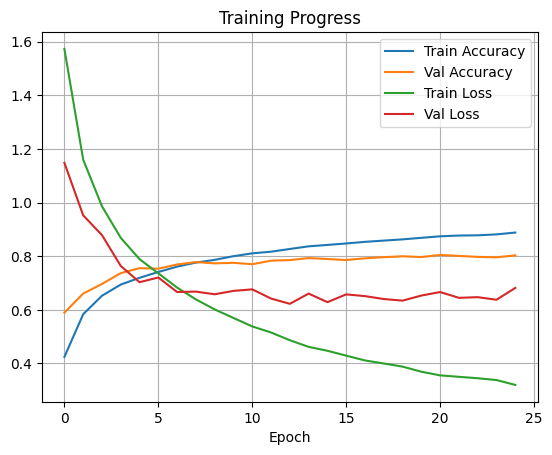

In [13]:
'''
Underfitting (low train & val accuracy)

Overfitting (train acc ≫ val acc)

Plateauing (no learning improvement)
'''
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.title("Training Progress")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
probs = model.predict(x_test[:5])
preds = np.argmax(probs, axis=1)

print("Predicted:", preds)
print("True     :", y_test[:5].flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step
Predicted: [3 8 8 8 6]
True     : [3 8 8 0 6]
